In [21]:
import numpy as np
import pandas as pd
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         196 non-null    float64
 1   Radio      195 non-null    float64
 2   Newspaper  195 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


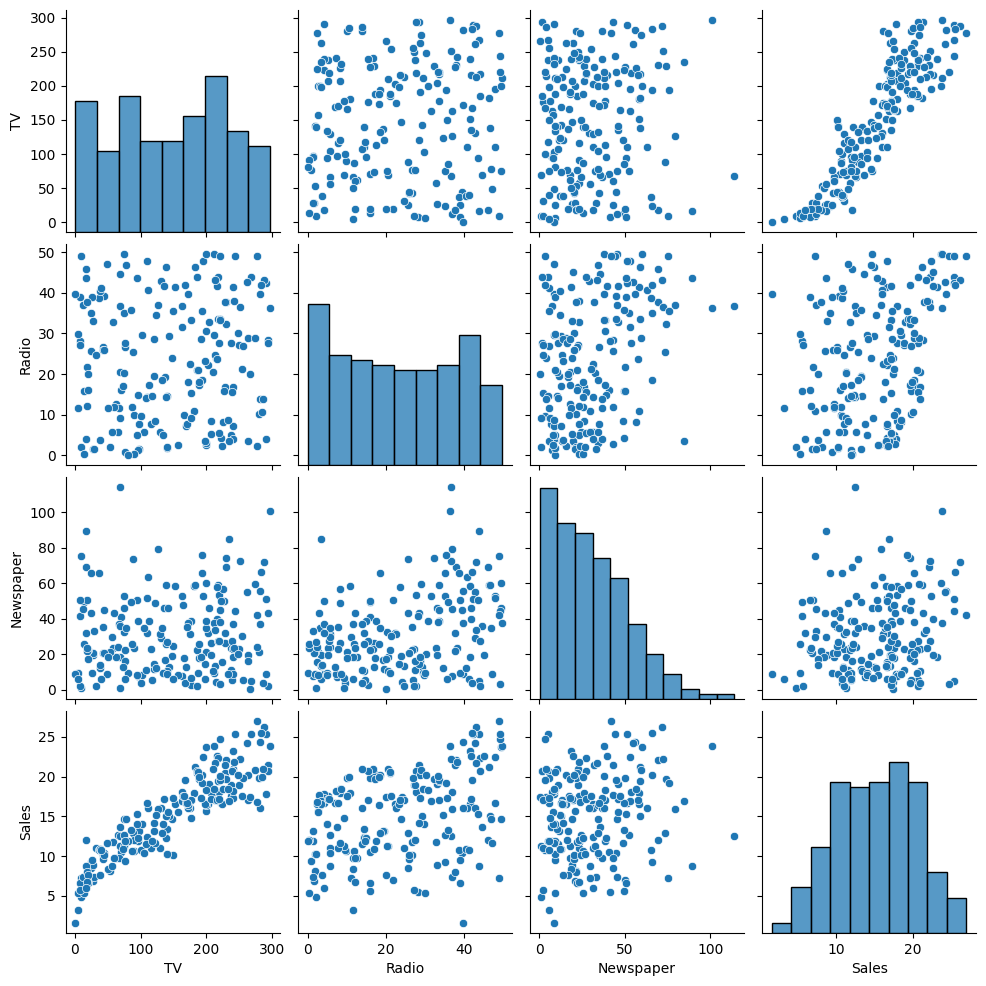

In [6]:
sns.pairplot(df)

<Axes: ylabel='Density'>

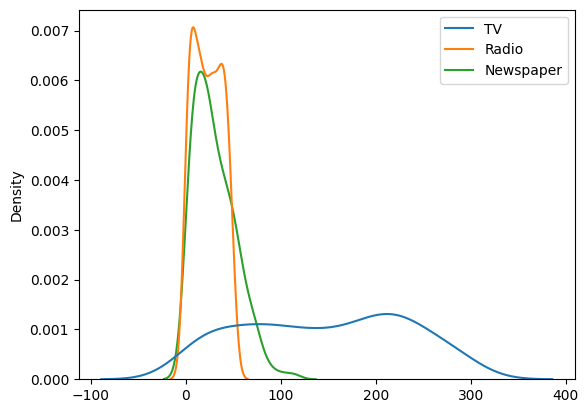

In [7]:
sns.kdeplot(df[['TV','Radio','Newspaper']])

In [8]:
print(f'How many duplicated values?: {df.duplicated().sum()}')
print(f"Null or missing values:\n{df.isnull().sum()}")

How many duplicated values?: 0
Null or missing values:
TV           4
Radio        5
Newspaper    5
Sales        0
dtype: int64


Preprocessing

In [9]:
df_clean = df.fillna(method='ffill')

C:\Users\Moham\AppData\Local\Temp\ipykernel_22944\1618781855.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df.fillna(method='ffill')


In [10]:
print(f'How many duplicated values after cleaning?: {df_clean.duplicated().sum()}')
print(f"Null or missing values after cleaning:\n{df_clean.isnull().sum()}")

How many duplicated values after cleaning?: 0
Null or missing values after cleaning:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [11]:
X = df_clean[[col for col in df.columns if col != "Sales"]]
y = df_clean[["Sales"]]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: ylabel='Density'>

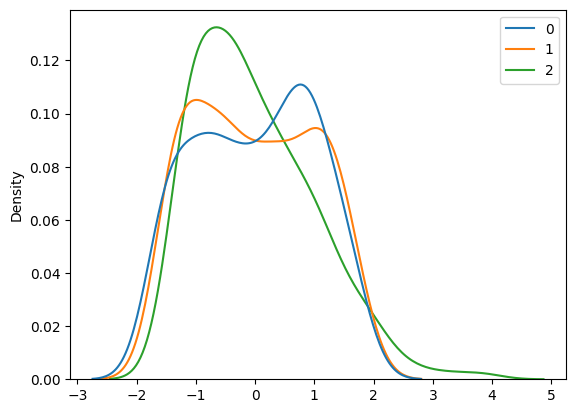

In [13]:
sns.kdeplot(X_scaled)

Modeling: Linear Regression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred_int = y_pred.astype(int)
y_test_int = y_test.astype(int)

Gradient Descent

In [23]:
GD = SGDRegressor()
GD.fit(X_train,y_train)

c:\Users\Moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [24]:
y_pred_GD = model.predict(X_test)

In [29]:
mse_GD = round(mean_squared_error(y_test, y_pred_GD),3)
print('Mean Squared error:', mse_GD)

Mean Squared error: 2.343


Residual plot and OLS metrics

In [ ]:
mse = round(mean_squared_error(y_test, y_pred),3)
accuracy =accuracy_score(y_pred_int, y_test_int)
mae = round(mean_absolute_error(y_test,y_pred),3)
print(f"Mean squared error: {mse}\nAccuracy score: {round(accuracy,3)}\nMean absolute error: {mae}")

Mean squared error: 2.343
Root mean squared error: 1.53
Accuracy score: 0.283
Mean absolute error: 1.206


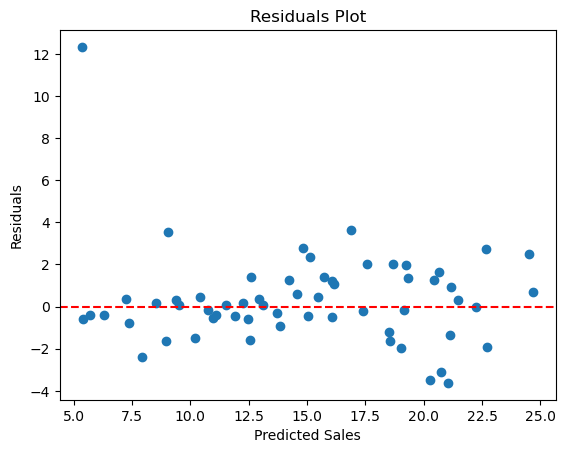

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

although our errors are high, the scaled data we entered is a good fit for our regression model as we can conclude from __Residual plot__:
the residuals are randomly scattered showing a linearity between the three features we entered.

our model can be far enhanced by __removing outliers__ and __entering more data__ for more accurate predictions